In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [ ]:
#Loading Dataset

df = pd.read_csv("customer_shopping_data.csv")

In [4]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [7]:
#Total Purchase Amount

df["TotalPurchase"] = df["price"] * df["quantity"]
purchase_amounts = df["TotalPurchase"]


In [8]:
#Descriptive Statistics

mean = purchase_amounts.mean()
std = purchase_amounts.std()

mean, std


(np.float64(2528.7892682264696), 4222.475781045694)

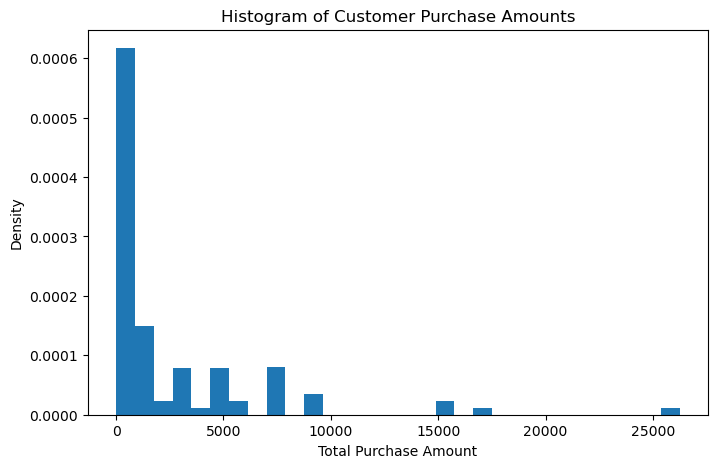

In [12]:
#Histogram of Purchase Amounts

plt.figure(figsize=(8, 5))
plt.hist(purchase_amounts, bins=30, density=True)
plt.xlabel("Total Purchase Amount")
plt.ylabel("Density")
plt.title("Histogram of Customer Purchase Amounts")
plt.show()


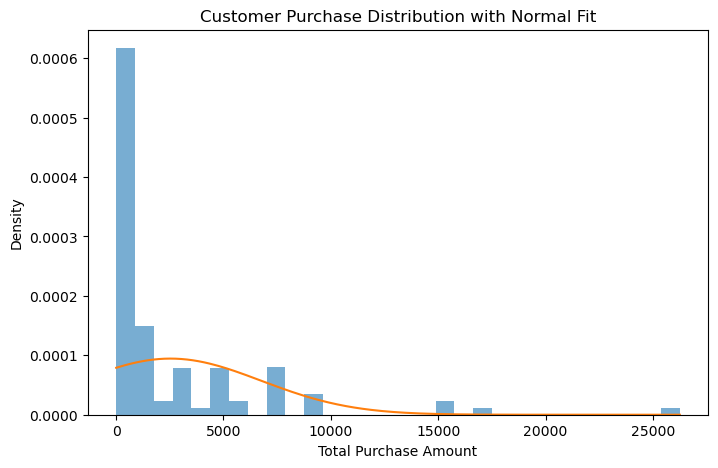

In [28]:
# Normal Distribution

x = np.linspace(purchase_amounts.min(), purchase_amounts.max(), 200)
y = norm.pdf(x, mean, std)

plt.figure(figsize=(8, 5))
plt.hist(purchase_amounts, bins=30, density=True, alpha=0.6)
plt.plot(x, y)

plt.xlabel("Total Purchase Amount")
plt.ylabel("Density")
plt.title("Customer Purchase Distribution with Normal Fit")
plt.show()


In [32]:
#Probability Above a Threshold

#for example spending more than 5000

threshold = 5000
prob_above_threshold = 1 - norm.cdf(threshold, mean, std)
prob_above_threshold


np.float64(0.27918927486803224)

In [ ]:
#Simulate Random Sales Data

simulated_sales = norm.rvs(mean, std, size=len(purchase_amounts))

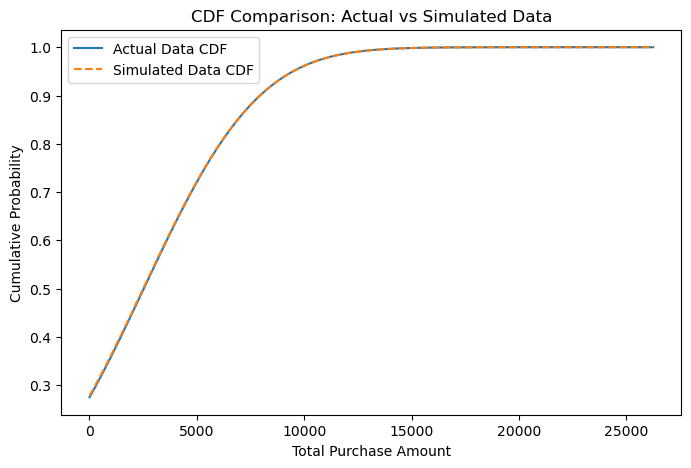

In [38]:
#Comparing Actual vs Simulated Data


x = np.linspace(
    purchase_amounts.min(),
    purchase_amounts.max(),
    300
)

actual_cdf = norm.cdf(x, mean, std)
simulated_cdf = norm.cdf(x, simulated_sales.mean(), simulated_sales.std())

plt.figure(figsize=(8, 5))
plt.plot(x, actual_cdf, label="Actual Data CDF")
plt.plot(x, simulated_cdf, linestyle="--", label="Simulated Data CDF")

plt.xlabel("Total Purchase Amount")
plt.ylabel("Cumulative Probability")
plt.title("CDF Comparison: Actual vs Simulated Data")
plt.legend()
plt.show()


In [36]:
print("Mean Purchase Amount:", round(mean, 2))
print("Standard Deviation:", round(std, 2))
print(f"Probability of spending above {threshold}: {prob_above_threshold:.4f}")


Mean Purchase Amount: 2528.79
Standard Deviation: 4222.48
Probability of spending above 5000: 0.2792
